In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from google.cloud import bigquery

In [3]:
client = bigquery.Client()
dataset_ref = client.dataset('ncaa_basketball', project='bigquery-public-data')
ncaa_dataset = client.get_dataset(dataset_ref)

In [4]:
[x.table_id for x in client.list_tables(ncaa_dataset)]

['mascots',
 'mbb_games_sr',
 'mbb_historical_teams_games',
 'mbb_historical_teams_seasons',
 'mbb_historical_tournament_games',
 'mbb_pbp_sr',
 'mbb_players_games_sr',
 'mbb_teams',
 'mbb_teams_games_sr',
 'team_colors']

In [5]:
ncaa_mbb_pbp_sr = client.get_table(ncaa_dataset.table('mbb_pbp_sr'))

In [6]:
# Determine all colulmns that exists in table
query = """
  SELECT * FROM `bigquery-public-data.ncaa_basketball.mbb_pbp_sr` LIMIT 4
"""

query_job = client.query(query)
results = query_job.result()
schema = results.schema
column_names = [field.name for field in schema]

In [7]:
query="""SELECT
  event_type,
  season,
  type,
  away_alias,
  home_alias,
  team_alias,
  team_market,
  team_name,
  team_basket,
  event_coord_x,
  event_coord_y,
  three_point_shot,
  shot_made,
FROM `bigquery-public-data.ncaa_basketball.mbb_pbp_sr`
WHERE season = 2017 AND type = "fieldgoal"
ORDER BY season"""

# Set up the query
query_job = client.query(query)
# API request - run the query, and return a pandas DataFrame
df_shots = query_job.to_dataframe()
df_shots

,event_type,season,type,away_alias,home_alias,team_alias,team_market,team_name,team_basket,event_coord_x,event_coord_y,three_point_shot,shot_made
0,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,88.0,255.0,False,False
1,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,99.0,255.0,False,False
2,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,71.0,327.0,False,False
3,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,240.0,177.0,False,False
4,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,237.0,336.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261170,twopointmade,2017,fieldgoal,UAV,SJSU,UAV,University of Antelope Valley,Pioneers,right,1037.0,349.0,False,True
261171,threepointmiss,2017,fieldgoal,UAV,SJSU,UAV,University of Antelope Valley,Pioneers,left,350.0,281.0,True,False
261172,threepointmade,2017,fieldgoal,UAV,SJSU,UAV,University of Antelope Valley,Pioneers,right,1000.0,568.0,True,True
261173,twopointmiss,2017,fieldgoal,UAV,SJSU,UAV,University of Antelope Valley,Pioneers,right,1009.0,257.0,False,False


In [8]:
df_shots.iloc[200,:]

event_type          twopointmade
season                      2017
type                   fieldgoal
away_alias                    KU
home_alias                  VILL
team_alias                  VILL
team_market            Villanova
team_name               Wildcats
team_basket                 left
event_coord_x               85.0
event_coord_y              270.0
three_point_shot           False
shot_made                   True
Name: 200, dtype: object

In [9]:
team_names = df_shots["team_alias"].unique()

In [10]:
teams = sorted(team_names, key=lambda x: '' if x is None else x)

In [11]:
df_shots[df_shots["home_alias"] == 'MSU']

,event_type,season,type,away_alias,home_alias,team_alias,team_market,team_name,team_basket,event_coord_x,event_coord_y,three_point_shot,shot_made
1047,twopointmiss,2017,fieldgoal,UNF,MSU,UNF,North Florida,Ospreys,left,140.0,140.0,False,False
1048,twopointmiss,2017,fieldgoal,UNF,MSU,UNF,North Florida,Ospreys,left,126.0,305.0,False,False
1049,threepointmade,2017,fieldgoal,UNF,MSU,UNF,North Florida,Ospreys,right,931.0,32.0,True,True
1050,twopointmiss,2017,fieldgoal,UNF,MSU,UNF,North Florida,Ospreys,left,85.0,264.0,False,False
1051,threepointmiss,2017,fieldgoal,UNF,MSU,UNF,North Florida,Ospreys,left,299.0,119.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258702,threepointmiss,2017,fieldgoal,LBSU,MSU,LBSU,Long Beach State,49ers,right,815.0,166.0,True,False
258703,twopointmade,2017,fieldgoal,LBSU,MSU,LBSU,Long Beach State,49ers,right,1017.0,440.0,False,True
258704,twopointmade,2017,fieldgoal,LBSU,MSU,LBSU,Long Beach State,49ers,left,68.0,334.0,False,True
258705,twopointmiss,2017,fieldgoal,LBSU,MSU,LBSU,Long Beach State,49ers,right,1027.0,248.0,False,False


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9

In [13]:
mask = (df_shots['team_basket'] == 'right')
z_valid = df_shots[mask]

df_shots['coord_x'] = df_shots['event_coord_x']
df_shots.loc[mask, 'coord_x'] = (94*12) - z_valid['event_coord_x'] 

df_shots['coord_y'] = df_shots['event_coord_y']
df_shots.loc[mask, 'coord_y'] = (50*12) - z_valid['event_coord_y'] 

df_shots

,event_type,season,type,away_alias,home_alias,team_alias,team_market,team_name,team_basket,event_coord_x,event_coord_y,three_point_shot,shot_made,coord_x,coord_y
0,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,88.0,255.0,False,False,88.0,255.0
1,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,99.0,255.0,False,False,99.0,255.0
2,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,71.0,327.0,False,False,71.0,327.0
3,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,240.0,177.0,False,False,240.0,177.0
4,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,237.0,336.0,False,False,237.0,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261170,twopointmade,2017,fieldgoal,UAV,SJSU,UAV,University of Antelope Valley,Pioneers,right,1037.0,349.0,False,True,91.0,251.0
261171,threepointmiss,2017,fieldgoal,UAV,SJSU,UAV,University of Antelope Valley,Pioneers,left,350.0,281.0,True,False,350.0,281.0
261172,threepointmade,2017,fieldgoal,UAV,SJSU,UAV,University of Antelope Valley,Pioneers,right,1000.0,568.0,True,True,128.0,32.0
261173,twopointmiss,2017,fieldgoal,UAV,SJSU,UAV,University of Antelope Valley,Pioneers,right,1009.0,257.0,False,False,119.0,343.0


In [14]:
# convert and rotate 90 degrees counter clockwise
df_shots['coord_x'] = (df_shots['coord_x']/12)
df_shots['coord_y'] = 25 - (df_shots['coord_y']/12)
df_shots['x'] = -1*(df_shots['coord_y'])
df_shots['y'] = (df_shots['coord_x']) - 5.25

In [15]:


# create shot distance and shot angle

df_shots['shot_distance'] = np.floor(np.sqrt(np.multiply(df_shots['x'],df_shots['x']) + np.multiply(df_shots['y'],df_shots['y'])))
df_shots['shot_angle'] = np.arccos(np.divide(df_shots['x'],df_shots['shot_distance'])) * 180/np.pi



/home/matteo/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in arccos


In [16]:
def circle_points(center = np.array([0,0]), radius = 1, npoints = 360):
    angles = np.linspace(start = 0, stop = 360, num = npoints,)
    xx = np.repeat(center[0],npoints) + radius * np.cos(angles * np.pi/180)
    yy = np.repeat(center[1],npoints) + radius*np.sin(angles * np.pi/180)
    data = {'x':xx,'y':yy}
    df = pd.DataFrame(data)
    return df

In [17]:
# Court plot

width = 50
height = 94 / 2
key_height = 19
inner_key_width = 12
outer_key_width = 16
backboard_width = 6
backboard_offset = 4
neck_length = 0.5
hoop_radius = 0.75
hoop_center_y = backboard_offset + neck_length + hoop_radius
three_point_radius = 23.75
three_point_side_radius = 22
three_point_side_height = 14
college_three_radius = 20.75

data = {'x':[width / 2, width / 2, -width / 2, -width / 2, width / 2] , 'y':[height, 0, 0, height, height]}
court_points = pd.DataFrame(data)
court_points['desc'] = np.repeat('perimeter',len(court_points.index))
court_points['y'] = court_points['y'] - 5.25

data = {'x':[outer_key_width / 2, outer_key_width / 2, -outer_key_width / 2, -outer_key_width / 2] , 'y':[0, key_height, key_height, 0]}
outer_key = pd.DataFrame(data)
outer_key['desc'] = np.repeat('outer_key',len(outer_key.index))
outer_key['y'] = outer_key['y'] - 5.25

#court_points = court_points.append(temp, ignore_index=True)

data = {'x':[-backboard_width / 2, backboard_width / 2] , 'y':[backboard_offset, backboard_offset]}
backboard = pd.DataFrame(data)
backboard['desc'] = np.repeat('backboard',len(backboard.index))
backboard['y'] = backboard['y'] - 5.25
#court_points = court_points.append(temp, ignore_index=True)

data = {'x':[0, 0] , 'y':[backboard_offset, backboard_offset + neck_length]}
neck = pd.DataFrame(data)
neck['desc'] = np.repeat('neck',len(neck.index))
neck['y'] = neck['y'] - 5.25
#court_points = court_points.append(temp, ignore_index=True)

foul_circle = circle_points(center = [0,key_height], radius = inner_key_width / 2)
foul_circle['desc'] = np.repeat('foul_circle_top',len(foul_circle.index))
foul_circle.loc[foul_circle['y'] < key_height,'desc'] = 'foul_circle_bottom'
foul_circle['y'] = foul_circle['y'] - 5.25

hoop = circle_points(center = [0,hoop_center_y], radius = hoop_radius)
hoop['desc'] = np.repeat('hoop',len(hoop.index))
hoop['y'] = hoop['y'] - 5.25

restricted = circle_points(center = [0,hoop_center_y], radius = 4)
restricted = restricted[restricted.y >= hoop_center_y]
restricted['desc'] = np.repeat('restricted',len(restricted.index))
restricted['y'] = restricted['y'] - 5.25

college_three_circle = circle_points(center = [0,hoop_center_y], radius = college_three_radius)
college_three_circle = college_three_circle[college_three_circle.y >= hoop_center_y]
college_three_circle['y'] = college_three_circle['y'] - 5.25

data = {'x':[ -college_three_radius, -college_three_radius] , 'y':[ hoop_center_y, 0]}
college_three_line = pd.DataFrame(data)
college_three_line['y'] = college_three_line['y'] - 5.25

data = {'x':[ college_three_radius, college_three_radius] , 'y':[ hoop_center_y, 0]}
college_three_linea = pd.DataFrame(data)
college_three_linea['y'] = college_three_linea['y'] - 5.25

college_key = pd.DataFrame()
data = {'x':[inner_key_width / 2, inner_key_width / 2, -inner_key_width / 2, -inner_key_width / 2] , 'y':[0, key_height, key_height, 0]}
temp = pd.DataFrame(data)
temp['desc'] = np.repeat('college_key',len(temp.index))
temp['desc'] = np.repeat('college_key', len(temp.index))
college_key = pd.concat([college_key, temp], ignore_index=True)
college_key['y'] = college_key['y'] - 5.25
college_key['y'] = college_key['y'] - 5.25

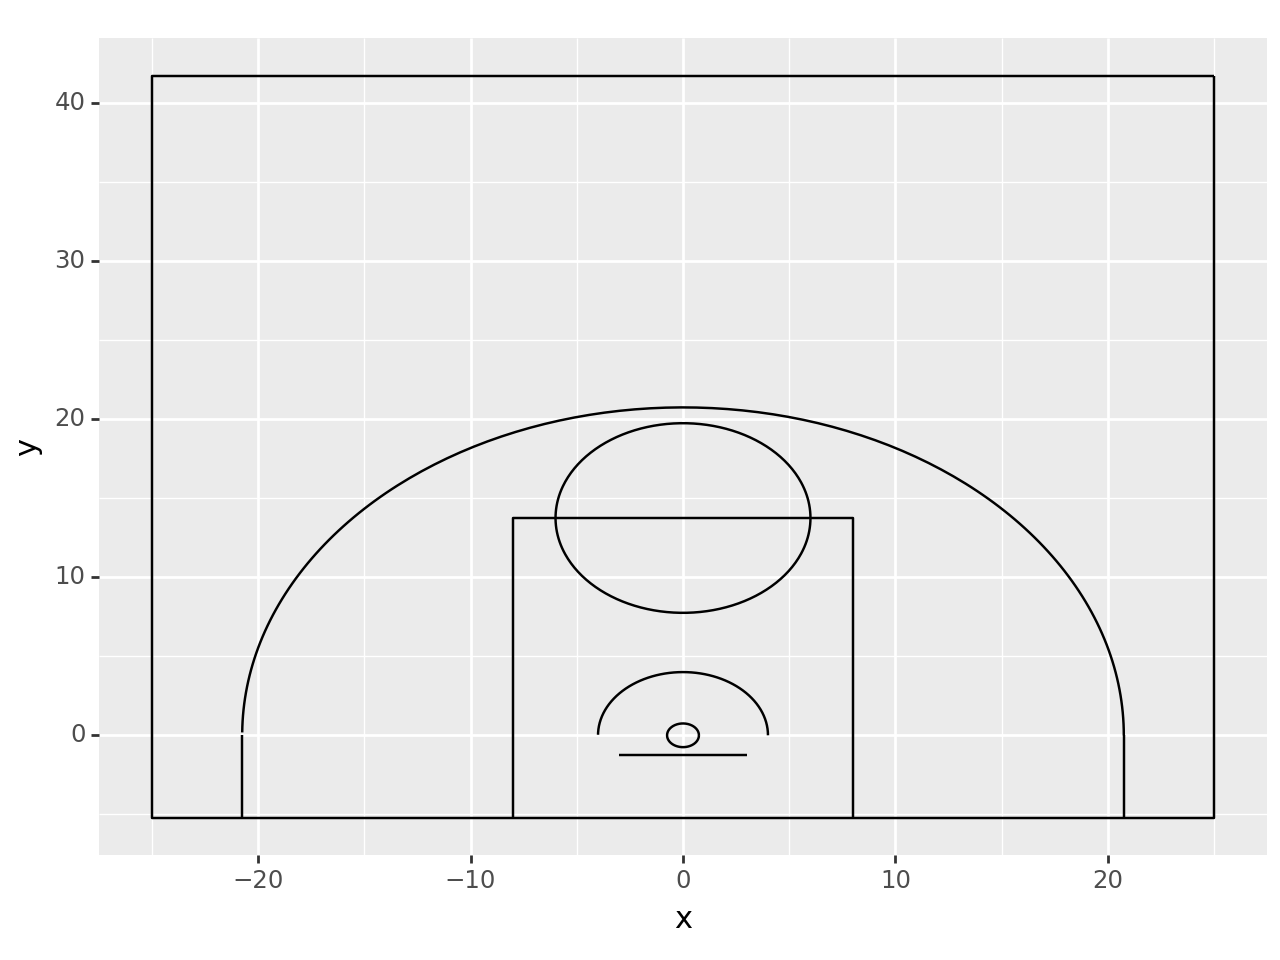

<Figure Size: (640 x 480)>

In [18]:
import plotnine as p9

college_court = p9.ggplot()

# Swap the parameters for data and mapping in geom_path
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=court_points)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=outer_key)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=backboard)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=foul_circle)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=hoop)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=restricted)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=college_three_circle)
#college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=college_key)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=college_three_line)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=college_three_linea)

college_court

In [19]:
df_shots

,event_type,season,type,away_alias,home_alias,team_alias,team_market,team_name,team_basket,event_coord_x,event_coord_y,three_point_shot,shot_made,coord_x,coord_y,x,y,shot_distance,shot_angle
0,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,88.0,255.0,False,False,7.333333,3.750000,-3.750000,2.083333,4.0,159.635865
1,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,99.0,255.0,False,False,8.250000,3.750000,-3.750000,3.000000,4.0,159.635865
2,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,71.0,327.0,False,False,5.916667,-2.250000,2.250000,0.666667,2.0,NaN
3,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,240.0,177.0,False,False,20.000000,10.250000,-10.250000,14.750000,17.0,127.080836
4,twopointmiss,2017,fieldgoal,KU,VILL,KU,Kansas,Jayhawks,left,237.0,336.0,False,False,19.750000,-3.000000,3.000000,14.500000,14.0,77.626375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261170,twopointmade,2017,fieldgoal,UAV,SJSU,UAV,University of Antelope Valley,Pioneers,right,1037.0,349.0,False,True,7.583333,4.083333,-4.083333,2.333333,4.0,NaN
261171,threepointmiss,2017,fieldgoal,UAV,SJSU,UAV,University of Antelope Valley,Pioneers,left,350.0,281.0,True,False,29.166667,1.583333,-1.583333,23.916667,23.0,93.947397
261172,threepointmade,2017,fieldgoal,UAV,SJSU,UAV,University of Antelope Valley,Pioneers,right,1000.0,568.0,True,True,10.666667,22.333333,-22.333333,5.416667,22.0,NaN
261173,twopointmiss,2017,fieldgoal,UAV,SJSU,UAV,University of Antelope Valley,Pioneers,right,1009.0,257.0,False,False,9.916667,-3.583333,3.583333,4.666667,5.0,44.220044


In [20]:
df_msu = df_shots[df_shots["team_alias"] == 'MSU']
df_msu = df_msu[df_msu["y"] < 50]
msu_x = df_msu['x']
msu_y = df_msu['y']
msu_made = df_msu["shot_made"]
msu_coordinates = {'x': msu_x, 'y': msu_y, 'shot_made':msu_made}
df = pd.DataFrame(msu_coordinates)

In [21]:
shot_map = college_court + p9.geom_point(p9.aes( x= 'x', y= 'y', color = 'shot_made'),df, alpha =0.5)
shot_map += p9.theme(figure_size=(10, 10))
shot_map += p9.coord_fixed(ratio=1)

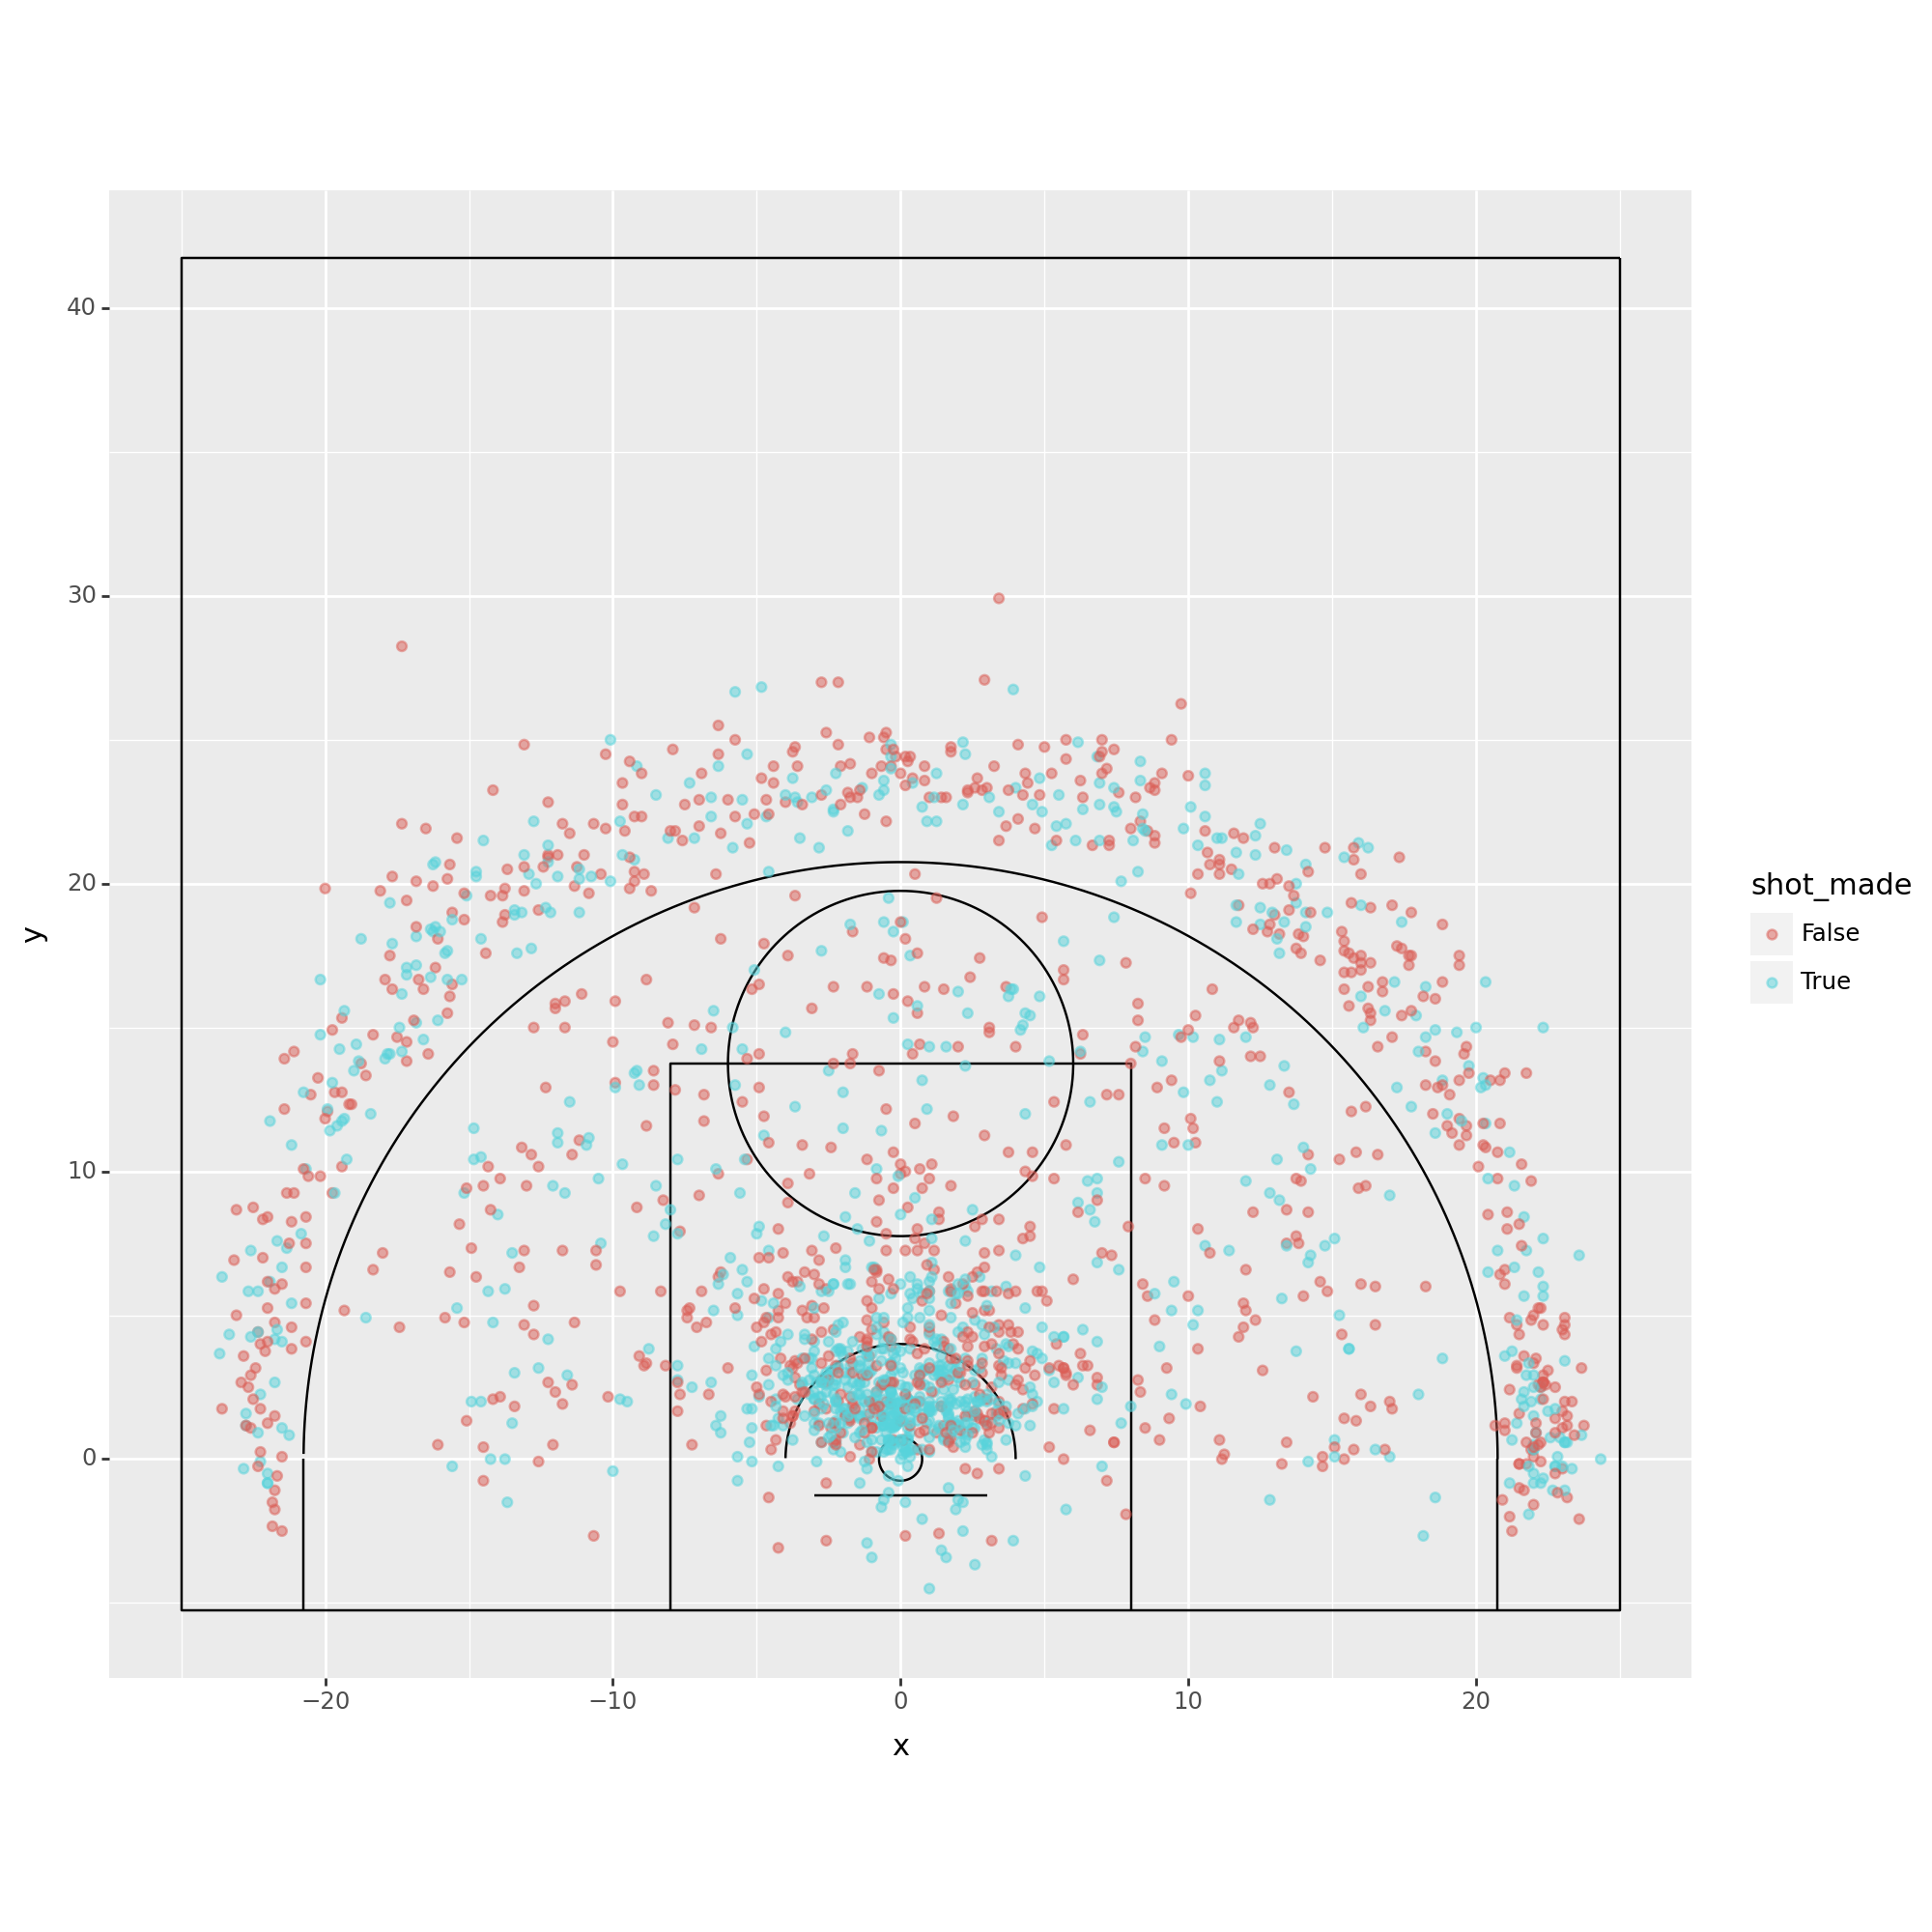

<Figure Size: (1000 x 1000)>

In [22]:
shot_map

- Corner 3 Right: x > 22.75 and y < 5
- Corner 3 Left: x < -22.75 and y <5
- Other 3's: All other points with distance from rim > 22.75
- At the rim: All shots with distance from rim < 4.5
- In the paoint: All shots distance < 21.75 and x^2 < 64 and y < 14

# Splitting up the court

We need to split the court up into certain scoring regions so we can try and narrow down where teams can shoot and where they can play defense well. This will enable our model to be more accurate (hopefully?)

## With K Means Clustering?

Just learned about K Means Clustering in class so we'll use that as an option I suppose

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [24]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    # Generate a plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f72f0142160>
Traceback (most recent call last):
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.mat

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f72f0142160>
Traceback (most recent call last):
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


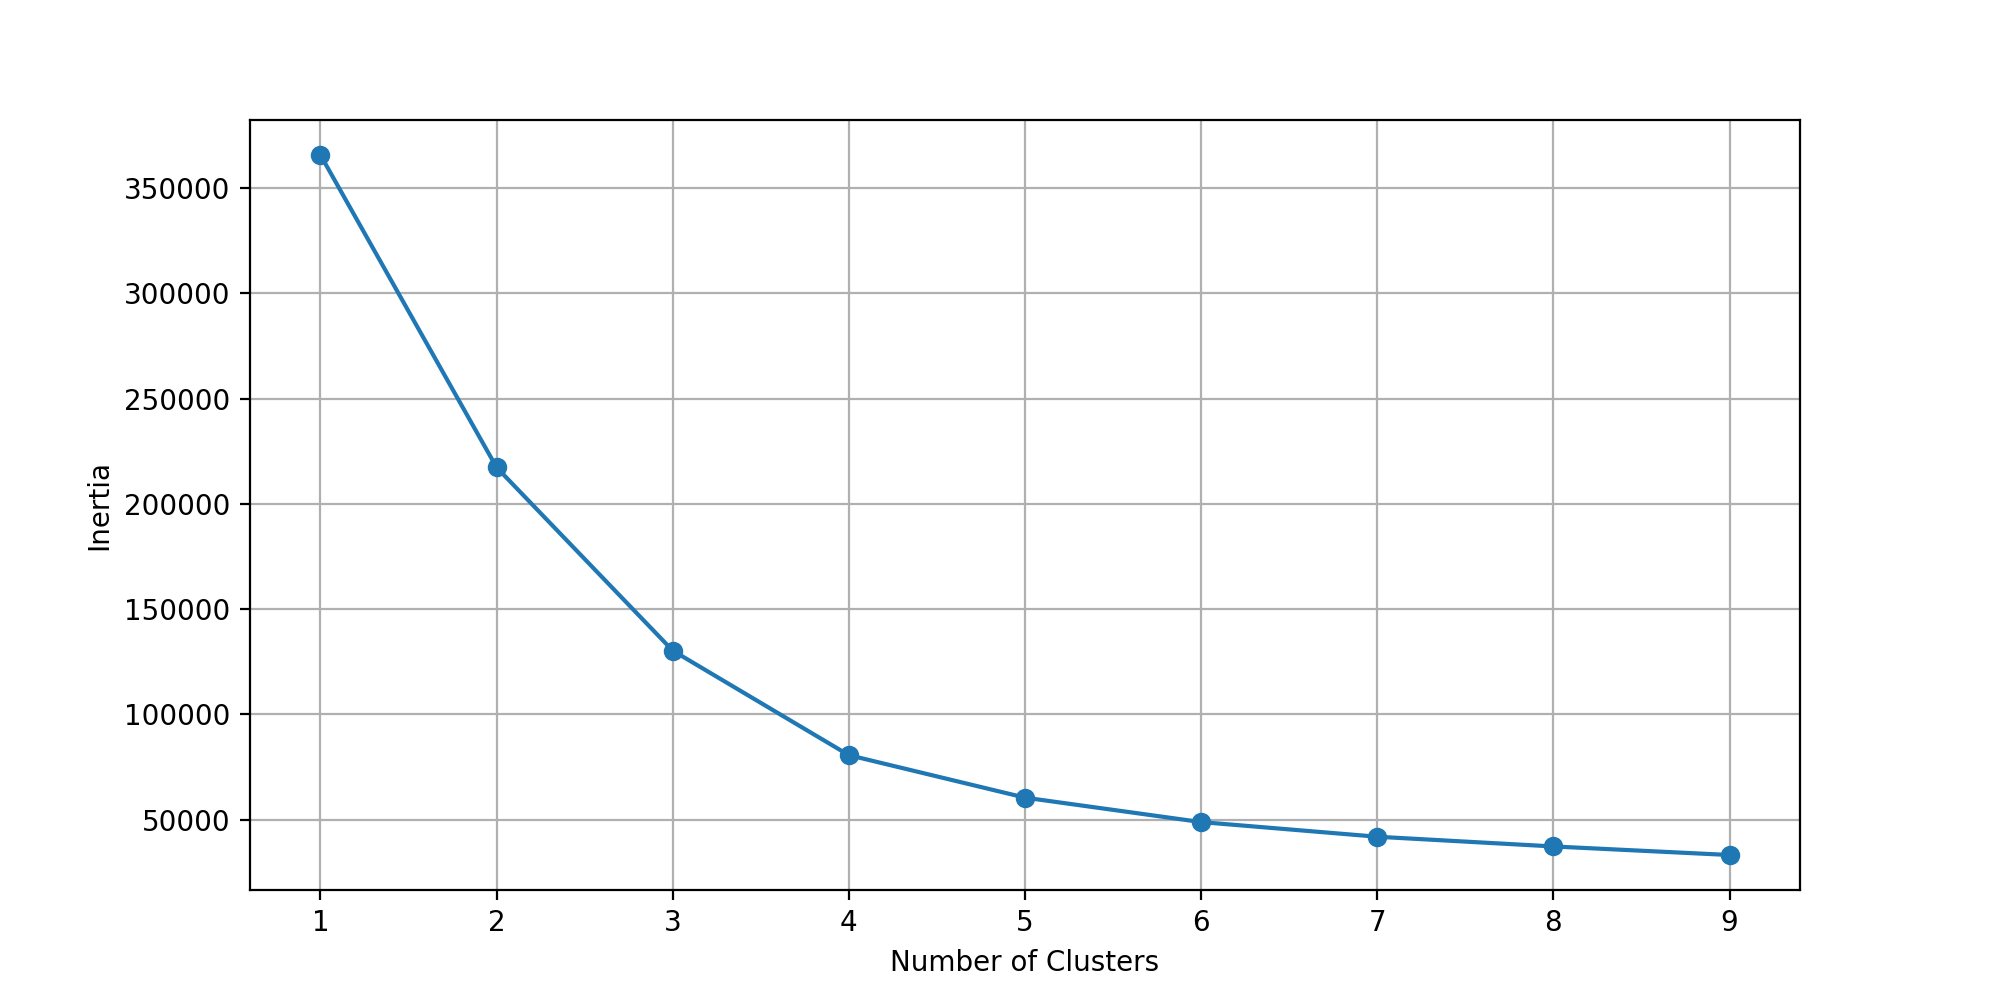

In [25]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

optimise_k_means(df_msu[['x','y']], 10)

# Reset the warning filter to default (optional)
warnings.resetwarnings()

In [26]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['x', 'y']])

/home/matteo/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


KMeans(n_clusters=5)

In [27]:
df_msu['kmeans_5'] = kmeans.labels_

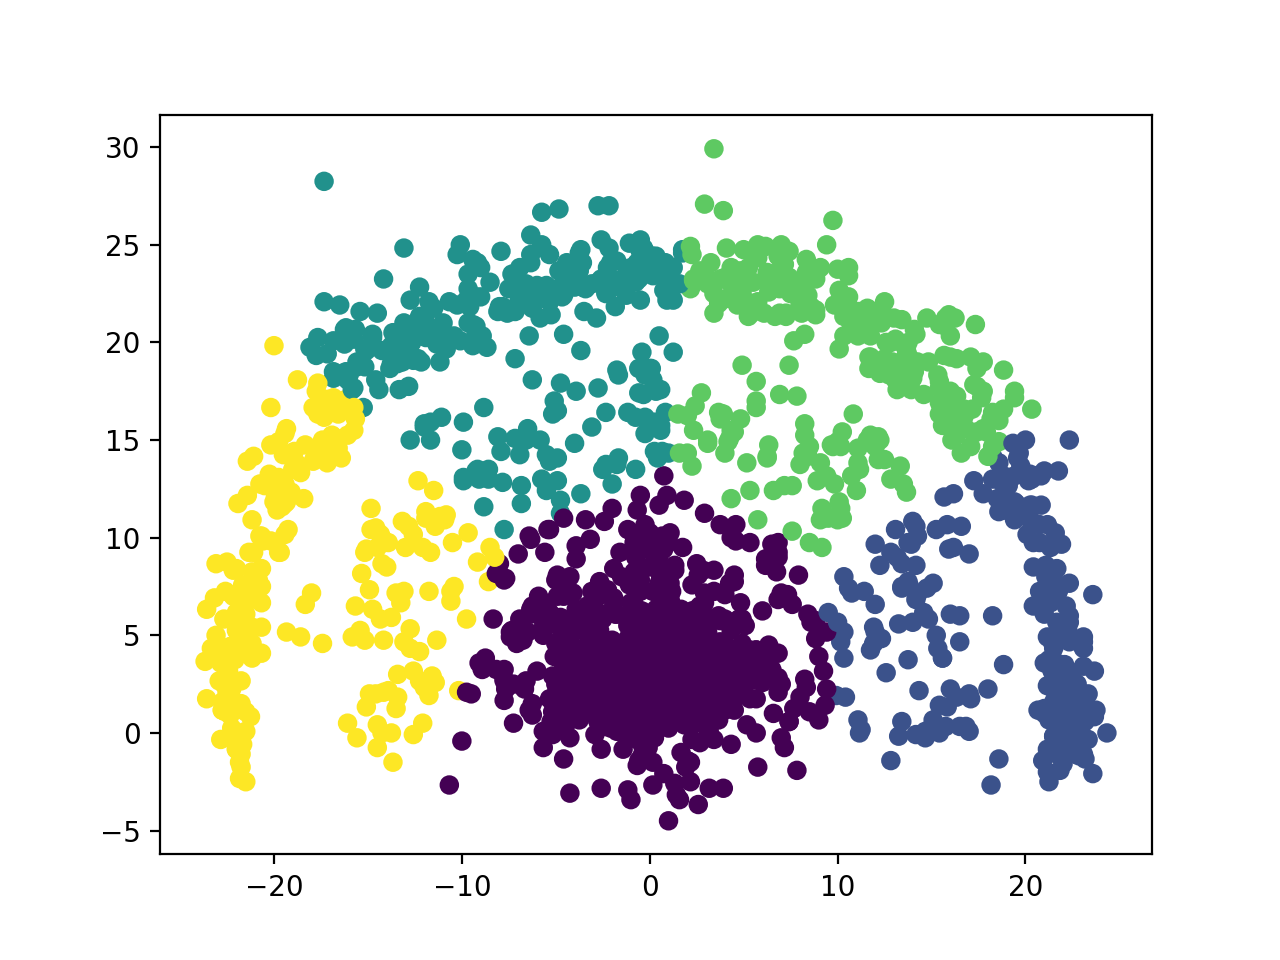

In [28]:
plt.scatter(x = df_msu['x'], y=df_msu['y'], c=df_msu['kmeans_5'])
plt.show()

Definitively interesting... Probably not what we're looking for though... Is there a better way?

## Splitting "Manually"

Lets instead look at how the zones are split up in other examples. Lets take cbbanalytics.com and look at their shot-chart tool. If we switch the Shot Zone chart type, we see 6 different shot zones. Let's instead try to base our shooting off of this.

QUICK NOTE:

It is my understanding that the size of the ncaa court has been changing over the decades. As a result, I am intentianally decreasing the 3 point distance so that anything near the 3 point line is considered a three. This may not be 100% accurate but I feel it is a reasonable assumption.

In [29]:
import numpy as np

# 0: ALL OTHER THREES
# 1: IN THE PAINT
# 2: RIM
# 3: CORNER 3 LEFT
# 4: CORNER 3 RIGHT
# 5: MIDRANGE 2'S

def classify_basketball_zones(x, y):
    # Define zone boundaries based on NCAA basketball court distances
    rim_distance = 4.5  # ft from the rim
    paint_height = 14  # ft
    corner3_distance = 21  # ft from the rim
    three_point_distance = 21  # ft from the rim
    midrange_2_distance = 15  # ft from the rim

    # Calculate distances from the rim for each point
    distances_from_rim = np.sqrt(x**2 + y**2)

    # Initialize all points as being a midrange 2
    classifications = np.full_like(x, 5, dtype=int)
    
    # In the paint
    in_paint_mask = (distances_from_rim <= corner3_distance) & (y <= paint_height) & ((x)**2 < 64)
    classifications[in_paint_mask] = 1

    # Rim
    classifications[distances_from_rim <= rim_distance] = 2

    # All other 3's
    three_point_mask = (distances_from_rim > three_point_distance)
    classifications[three_point_mask] = 0
    
    # Corner 3 left
    corner3_left_mask = (x <= -corner3_distance) & (y <= 5)
    classifications[corner3_left_mask] = 3

    # Corner 3 right
    corner3_right_mask = (x >= corner3_distance) & (y <= 5)
    classifications[corner3_right_mask] = 4



    return classifications

# Example usage
x_coordinates = np.array([0, -5, 20, 0, 10, -15, 0, 25])
y_coordinates = np.array([5, 3, 10, -5, 25, -5, 0, 0])

zone_classifications = classify_basketball_zones(x_coordinates, y_coordinates)

# Display the results
for x, y, classification in zip(x_coordinates, y_coordinates, zone_classifications):
    print(f"Point ({x}, {y}) is classified as: {classification}")


Point (0, 5) is classified as: 1
Point (-5, 3) is classified as: 1
Point (20, 10) is classified as: 0
Point (0, -5) is classified as: 1
Point (10, 25) is classified as: 0
Point (-15, -5) is classified as: 5
Point (0, 0) is classified as: 2
Point (25, 0) is classified as: 4


In [30]:
zones = classify_basketball_zones(df_msu['x'], df_msu['y'])
df_msu['zone'] = zones

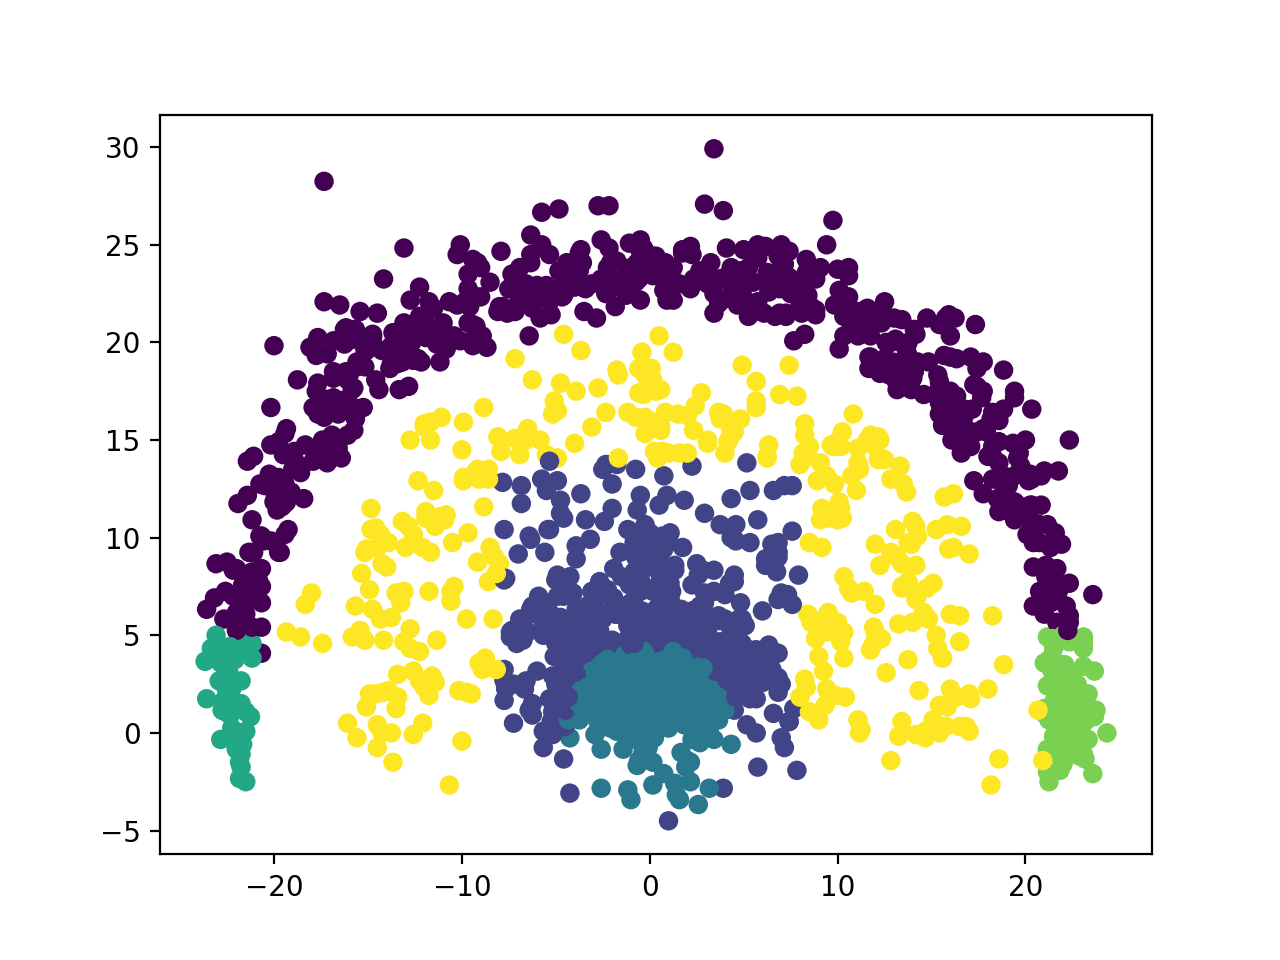

In [31]:
plt.scatter(x = df_msu['x'], y=df_msu['y'], c=df_msu['zone'])
plt.show()

# Determine Numbers

We need to now use these zones to calculate some fun numbers


## Offense

Utilizing the zones we just created we can determine the accuracy of the offense during the season from each zone

In [32]:
zone_shooting = {}

for zone in df_msu['zone'].unique():
    tmp_df = df_msu[df_msu['zone'] == zone]
    made_df = tmp_df[tmp_df['shot_made'] == 1]
    zone_shooting[zone] = len(made_df)/len(tmp_df)

In [33]:
sorted_dict = {key: zone_shooting[key] for key in sorted(zone_shooting)}

In [34]:
sorted_dict

{0: 0.4045936395759717,
 1: 0.45145631067961167,
 2: 0.7215909090909091,
 3: 0.3958333333333333,
 4: 0.41509433962264153,
 5: 0.3963963963963964}

## Defense

We also want to see allowed points. We're going to modify the table so that we only take shots who were made against MSU

In [35]:
matchup_dict = df_shots.set_index('team_alias')['team_market'].to_dict()

In [36]:
df_shots['away_alias'] = df_shots['away_alias'].map(matchup_dict)
df_shots['home_alias'] = df_shots['home_alias'].map(matchup_dict)

In [37]:
df_shots['opponent'] = np.where(df_shots.iloc[:, 6] == df_shots.iloc[:, 3], df_shots.iloc[:, 4], df_shots.iloc[:, 3])

In [38]:
df_shots

,event_type,season,type,away_alias,home_alias,team_alias,team_market,team_name,team_basket,event_coord_x,event_coord_y,three_point_shot,shot_made,coord_x,coord_y,x,y,shot_distance,shot_angle,opponent
0,twopointmiss,2017,fieldgoal,Kansas,Villanova,KU,Kansas,Jayhawks,left,88.0,255.0,False,False,7.333333,3.750000,-3.750000,2.083333,4.0,159.635865,Villanova
1,twopointmiss,2017,fieldgoal,Kansas,Villanova,KU,Kansas,Jayhawks,left,99.0,255.0,False,False,8.250000,3.750000,-3.750000,3.000000,4.0,159.635865,Villanova
2,twopointmiss,2017,fieldgoal,Kansas,Villanova,KU,Kansas,Jayhawks,left,71.0,327.0,False,False,5.916667,-2.250000,2.250000,0.666667,2.0,NaN,Villanova
3,twopointmiss,2017,fieldgoal,Kansas,Villanova,KU,Kansas,Jayhawks,left,240.0,177.0,False,False,20.000000,10.250000,-10.250000,14.750000,17.0,127.080836,Villanova
4,twopointmiss,2017,fieldgoal,Kansas,Villanova,KU,Kansas,Jayhawks,left,237.0,336.0,False,False,19.750000,-3.000000,3.000000,14.500000,14.0,77.626375,Villanova
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261170,twopointmade,2017,fieldgoal,University of Antelope Valley,San Jose State,UAV,University of Antelope Valley,Pioneers,right,1037.0,349.0,False,True,7.583333,4.083333,-4.083333,2.333333,4.0,NaN,San Jose State
261171,threepointmiss,2017,fieldgoal,University of Antelope Valley,San Jose State,UAV,University of Antelope Valley,Pioneers,left,350.0,281.0,True,False,29.166667,1.583333,-1.583333,23.916667,23.0,93.947397,San Jose State
261172,threepointmade,2017,fieldgoal,University of Antelope Valley,San Jose State,UAV,University of Antelope Valley,Pioneers,right,1000.0,568.0,True,True,10.666667,22.333333,-22.333333,5.416667,22.0,NaN,San Jose State
261173,twopointmiss,2017,fieldgoal,University of Antelope Valley,San Jose State,UAV,University of Antelope Valley,Pioneers,right,1009.0,257.0,False,False,9.916667,-3.583333,3.583333,4.666667,5.0,44.220044,San Jose State


In [40]:
df_msu = df_shots[df_shots["opponent"] == matchup_dict['MSU']]
df_msu = df_msu[df_msu["y"] < 40]
msu_x = df_msu['x']
msu_y = df_msu['y']
msu_made = df_msu["shot_made"]
msu_coordinates = {'x': msu_x, 'y': msu_y, 'shot_made':msu_made}
df = pd.DataFrame(msu_coordinates)

In [41]:
zones = classify_basketball_zones(df_msu['x'], df_msu['y'])
df_msu['zone'] = zones

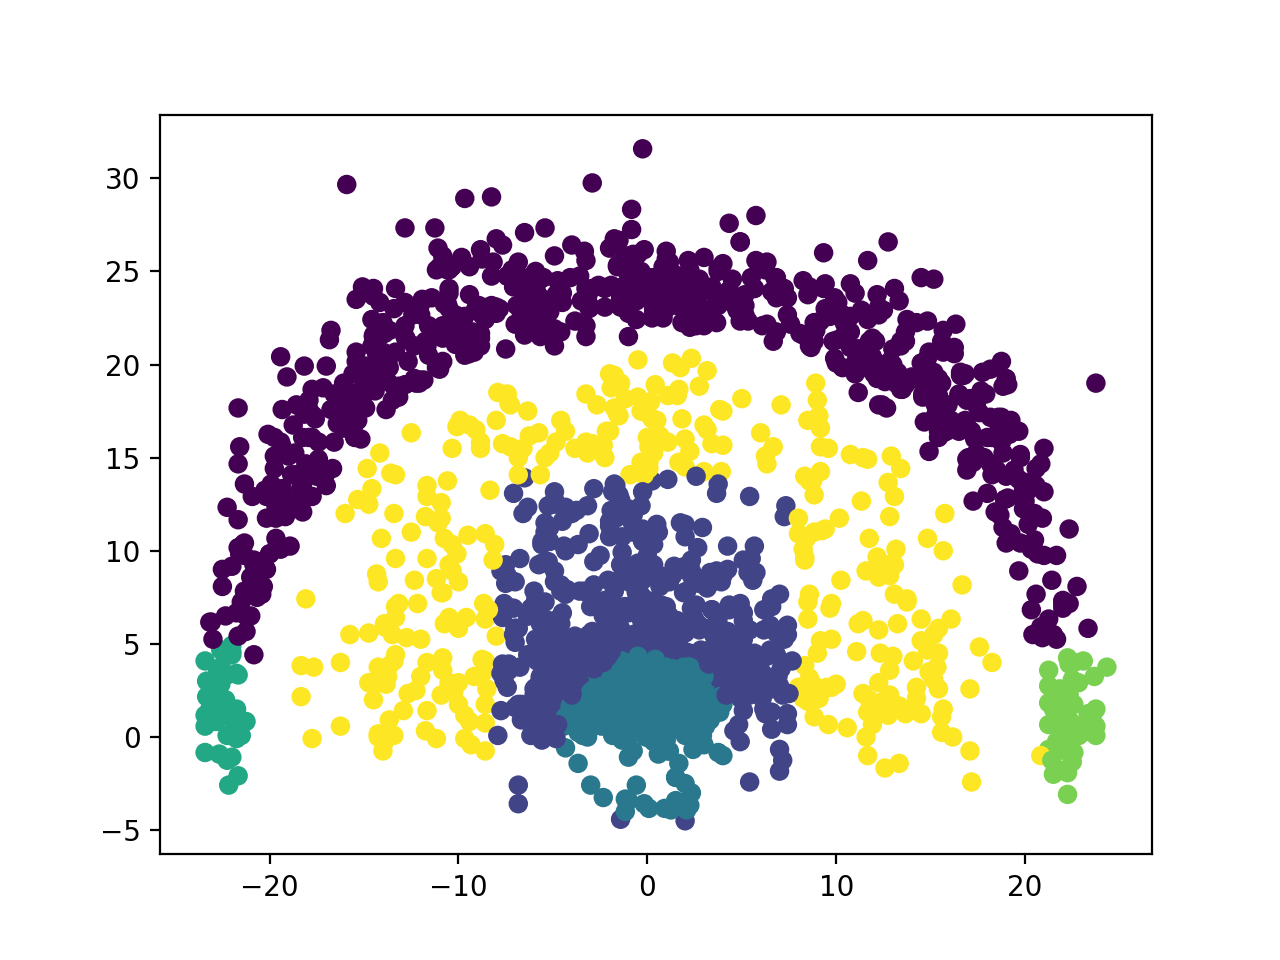

In [42]:
plt.scatter(x = df_msu['x'], y=df_msu['y'], c=df_msu['zone'])
plt.show()

In [43]:
zone_shooting = {}

for zone in df_msu['zone'].unique():
    tmp_df = df_msu[df_msu['zone'] == zone]
    made_df = tmp_df[tmp_df['shot_made'] == 1]
    zone_shooting[zone] = len(made_df)/len(tmp_df)

In [44]:
sorted_dict = {key: zone_shooting[key] for key in sorted(zone_shooting)}
sorted_dict

{0: 0.3353566009104704,
 1: 0.3358070500927644,
 2: 0.4909819639278557,
 3: 0.2972972972972973,
 4: 0.3888888888888889,
 5: 0.2996845425867508}

# Build Columns

We've now figured out how to determine the offense and defense percentages in each zone for a single team. We now need to figure out how to apply this to every team, and then add to the game dataset as another feature

In [45]:
team_market = sorted(df_shots["team_market"].unique(), key=lambda x: '' if x is None else x)[1:]

In [46]:
def mask_team(df_shots, team, offense):
    if offense is True:
        df_tmp = df_shots[df_shots["team_market"] == team]
    else:
        df_tmp = df_shots[df_shots["opponent"] == team]
    df_tmp = df_tmp[df_tmp["y"] < 40]
    tmp_x = df_tmp['x']
    tmp_y = df_tmp['y']
    df_made = df_tmp["shot_made"]
    tmp_coordinates = {'x': tmp_x, 'y': tmp_y, 'shot_made':df_made}
    df = pd.DataFrame(tmp_coordinates)
    return df

def add_zones(df):
    zones = classify_basketball_zones(df['x'], df['y'])
    df['zone'] = zones
    
def calculate_scores(df, final_df, team):
    values = []
    for zone in [0,1,2,3,4,5]:
        tmp_df = df[df['zone'] == zone]
        made_df = tmp_df[tmp_df['shot_made'] == 1]
        if len(tmp_df) == 0:
            values.append(0)
        else:
            values.append(len(made_df)/len(tmp_df))
    final_df[team] = values

In [52]:
o_scores = {}
d_scores = {}

for team in team_market:
    offense_df = mask_team(df_shots, team, True)
    defense_df = mask_team(df_shots, team, False)
    add_zones(offense_df)
    add_zones(defense_df)
    calculate_scores(offense_df, o_scores, team)
    calculate_scores(defense_df, d_scores, team)

In [53]:
d_scores

{'Air Force': [0.37894736842105264,
  0.3623853211009174,
  0.7021276595744681,
  0.41379310344827586,
  0.5,
  0.34408602150537637],
 'Akron': [0.3541666666666667,
  0.4583333333333333,
  0.7222222222222222,
  0.5555555555555556,
  0.3333333333333333,
  0.41379310344827586],
 'Alabama': [0.31546707503828486,
  0.38923395445134573,
  0.5981818181818181,
  0.35,
  0.4186046511627907,
  0.36329588014981273],
 'Alabama A&M': [0.44086021505376344,
  0.5535714285714286,
  0.89,
  0.16666666666666666,
  0.625,
  0.3333333333333333],
 'Alabama State': [0.425,
  0.46296296296296297,
  0.6813186813186813,
  0.3333333333333333,
  0.4,
  0.375],
 'Albany': [0.32,
  0.48484848484848486,
  0.5614035087719298,
  0.5,
  0.4,
  0.2631578947368421],
 'Alcorn State': [0.43859649122807015,
  0.5833333333333334,
  0.6666666666666666,
  0.5555555555555556,
  0.3,
  0.4],
 'American University': [0.5,
  0.47368421052631576,
  0.5974025974025974,
  0.5,
  0.5555555555555556,
  0.42857142857142855],
 'Appalac

In [54]:
# 0: ALL OTHER THREES
# 1: IN THE PAINT
# 2: RIM
# 3: CORNER 3 LEFT
# 4: CORNER 3 RIGHT
# 5: MIDRANGE 2'S
column_mapping_O = {0: 'O_All Other 3s', 1: 'O_In the Paint', 2: 'O_Rim', 3: 'O_Corner 3 Left', 4: 'O_Corner 3 Right', 5: 'O_Mid 2'}
column_mapping_D = {0: 'D_All Other 3s', 1: 'D_In the Paint', 2: 'D_Rim', 3: 'D_Corner 3 Left', 4: 'D_Corner 3 Right', 5: 'D_Mid 2'}

offense = pd.DataFrame(o_scores).T
offense.rename(columns=column_mapping_O, inplace=True)
defense = pd.DataFrame(d_scores).T
defense.rename(columns=column_mapping_D, inplace=True)

In [55]:
result = pd.concat([offense, defense], axis=1)

In [56]:
result

,O_All Other 3s,O_In the Paint,O_Rim,O_Corner 3 Left,O_Corner 3 Right,O_Mid 2,D_All Other 3s,D_In the Paint,D_Rim,D_Corner 3 Left,D_Corner 3 Right,D_Mid 2
Air Force,0.333333,0.342697,0.656109,0.441176,0.441176,0.319588,0.378947,0.362385,0.702128,0.413793,0.500000,0.344086
Akron,0.370968,0.343750,0.666667,0.461538,0.142857,0.379310,0.354167,0.458333,0.722222,0.555556,0.333333,0.413793
Alabama,0.312388,0.453271,0.658879,0.393939,0.376623,0.315000,0.315467,0.389234,0.598182,0.350000,0.418605,0.363296
Alabama A&M,0.343284,0.241758,0.650794,0.375000,0.500000,0.250000,0.440860,0.553571,0.890000,0.166667,0.625000,0.333333
Alabama State,0.303030,0.371795,0.500000,0.000000,0.600000,0.268293,0.425000,0.462963,0.681319,0.333333,0.400000,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...
Wright State,0.315789,0.254902,0.622642,0.333333,0.800000,0.269231,0.285714,0.403509,0.604651,0.200000,0.444444,0.365854
Wyoming,0.333996,0.428571,0.653207,0.403846,0.365079,0.325758,0.362924,0.434402,0.602667,0.378378,0.559322,0.399160
Xavier,0.369281,0.471963,0.658156,0.392157,0.400000,0.379679,0.326232,0.432802,0.617699,0.408451,0.329268,0.364912
Yale,0.281818,0.394366,0.666667,0.125000,0.380952,0.437500,0.347826,0.600000,0.648649,0.400000,0.444444,0.463415


In [57]:
result.to_csv("shot_zones.csv", index=True)